In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_df(path):
    # Load data to a dataframe
    with open(path) as f:
        d = yaml.load(f)

    df = pd.DataFrame(columns=['run', 'ndim', 'method', 'f(x)', 'nfev', 'ng', 'time'])

    for k1 in d.keys():
        for k2 in d[k1].keys():
            for k3 in d[k1][k2].keys():
                s = pd.Series({
                    'run': int(k1.split('=')[-1]),
                    'ndim': int(k2.split('=')[-1]),
                    'method': k3.split('=')[-1],
                    'f(x)': float(d[k1][k2][k3]['f(x)']),
                    'nfev': float(d[k1][k2][k3]['nfev']),
                    'ng': float(d[k1][k2][k3]['ng']),
                    'time': float(d[k1][k2][k3]['time']),
                    'mut': d[k1][k2][k3]['mut']
                })
                df = df.append(s, ignore_index=True)

    return df

df1 = load_df('results/test_1.yaml')
df2 = load_df('results/test_2.yaml')
df3 = load_df('results/test_3.yaml')

df = pd.concat([df1, df2, df3])
df

,run,ndim,method,f(x),nfev,ng,time,mut
0,0,128,differential_evolution,607.772149,2521600.0,196.0,1812.867516,"(0, 1.9)"
1,0,128,ga,77.672830,99100.0,1000.0,38.790174,0.01
2,0,128,monte_carlo,10093.182916,100000.0,1000.0,3.283945,None
3,0,16,differential_evolution,20.991385,185600.0,115.0,20.208004,"(0, 1.9)"
4,0,16,ga,0.999494,75637.0,763.0,21.115520,0.01
...,...,...,...,...,...,...,...,...
100,4,64,ga,33.698235,99100.0,1000.0,30.050938,0.0025
101,4,64,monte_carlo,4464.855938,100000.0,1000.0,2.722074,None
102,4,8,differential_evolution,24.987345,24000.0,29.0,1.806613,"(0, 0.5)"
103,4,8,ga,19.989873,41383.0,417.0,11.674174,0.0025


In [3]:
# Calculate average results
summary = df.groupby(['method', 'mut', 'ndim']).mean()
summary

f(x)       nfev      ng  \
method                 mut      ndim                                    
differential_evolution (0, 0.5) 2         0.999494     3880.0    18.4   
                                4         2.398785     8880.0    21.2   
                                8        15.792000    21280.0    25.6   
                                16       43.977870    56960.0    34.6   
                                32      137.333938   122240.0    37.2   
                                64      293.851771   279040.0    42.6   
                                128     675.107324   839680.0    64.6   
                       (0, 1.0) 2         0.199899     6320.0    30.6   
                                4         1.199393    13600.0    33.0   
                                8         5.997034    32320.0    39.4   
                                16       26.586877   121600.0    75.0   
                                32      104.173898   238080.0    73.4   
                                64      305.268626   663040.0   102.6   
                                128     622.685931  1433600.0   111.0   
                       (0, 1.9) 2         0.000000    12440.0    61.2   
                                4         1.599210    30400.0    75.0   
                                8         3.598234    59520.0    73.4   
                                16       27.387767   155200.0    96.0   
                                32       98.572912   469120.0   145.6   
                                64      289.261617  1350400.0   210.0   
                                128     610.916339  3368960.0   262.2   
ga                     0.0025   2         0.000218    12633.4   126.6   
                                4         2.998481    34670.8   349.2   
                                8        10.594633    49540.6   499.4   
                                16       11.394265    85220.2   859.8   
                                32       10.452122    99100.0  1000.0   
                                64       34.348730    99100.0  1000.0   
                                128     111.235635    99100.0  1000.0   
                       0.01     2         0.200380    16751.8   168.2   
                                4         0.000626    33779.8   340.2   
                                8         0.799959    55718.2   561.8   
                                16        1.799263    80151.4   808.6   
                                32        3.350806    99100.0  1000.0   
                                64       12.136916    99100.0  1000.0   
                                128      76.607478    99100.0  1000.0   
                       0.05     2         0.000385    14771.8   148.2   
                                4         0.000692    27483.4   276.6   
                                8         0.800157    40551.4   408.6   
                                16        0.200563    77320.0   780.0   
                                32        1.167169    99100.0  1000.0   
                                64       68.803093    99100.0  1000.0   
                                128     917.954707    99100.0  1000.0   
monte_carlo            None     2         0.659094   100000.0  1000.0   
                                4        17.025576   100000.0  1000.0   
                                8       125.288674   100000.0  1000.0   
                                16      558.129605   100000.0  1000.0   
                                32     1717.789953   100000.0  1000.0   
                                64     4369.799594   100000.0  1000.0   
                                128   10203.896260   100000.0  1000.0   

                                             time  
method                 mut      ndim               
differential_evolution (0, 0.5) 2        0.227923  
                                4        0.560918  
                                8        1.620660  
                                16       6.092179  
          

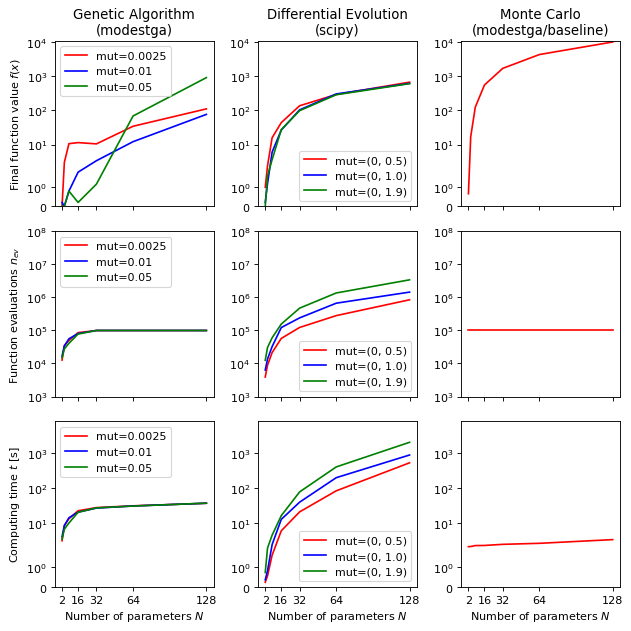

In [4]:
fig, axes = plt.subplots(3, 3, sharey=False, sharex=True, figsize=(8, 8), dpi=80)

ax = axes[0, 0]
ax.set_xticks([2, 16, 32, 64, 128])
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_ylabel('Final function value $f(x)$')
ax.set_title('Genetic Algorithm\n(modestga)')
ax.plot(summary.loc[('ga', '0.0025', slice(None)), ['f(x)']].droplevel([0, 1]), label='mut=0.0025', c='r')
ax.plot(summary.loc[('ga', '0.01', slice(None)), ['f(x)']].droplevel([0, 1]), label='mut=0.01', c='b')
ax.plot(summary.loc[('ga', '0.05', slice(None)), ['f(x)']].droplevel([0, 1]), label='mut=0.05', c='g')
ax.legend(loc='upper left')

ax = axes[0, 1]
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_title('Differential Evolution\n(scipy)')
ax.plot(summary.loc[('differential_evolution', '(0, 0.5)', slice(None)), ['f(x)']].droplevel([0, 1]), label='mut=(0, 0.5)', c='r')
ax.plot(summary.loc[('differential_evolution', '(0, 1.0)', slice(None)), ['f(x)']].droplevel([0, 1]), label='mut=(0, 1.0)', c='b')
ax.plot(summary.loc[('differential_evolution', '(0, 1.9)', slice(None)), ['f(x)']].droplevel([0, 1]), label='mut=(0, 1.9)', c='g')
ax.legend(loc='lower right')

ax = axes[0, 2]
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_title('Monte Carlo\n(modestga/baseline)')
ax.plot(summary.loc[('monte_carlo', 'None', slice(None)), ['f(x)']].droplevel([0, 1]), c='r')

ax = axes[1, 0]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.set_ylabel('Function evaluations $n_{ev}$')
ax.plot(summary.loc[('ga', '0.0025', slice(None)), ['nfev']].droplevel([0, 1]), label='mut=0.0025', c='r')
ax.plot(summary.loc[('ga', '0.01', slice(None)), ['nfev']].droplevel([0, 1]), label='mut=0.01', c='b')
ax.plot(summary.loc[('ga', '0.05', slice(None)), ['nfev']].droplevel([0, 1]), label='mut=0.05', c='g')
ax.legend(loc='upper left')

ax = axes[1, 1]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.plot(summary.loc[('differential_evolution', '(0, 0.5)', slice(None)), ['nfev']].droplevel([0, 1]), label='mut=(0, 0.5)', c='r')
ax.plot(summary.loc[('differential_evolution', '(0, 1.0)', slice(None)), ['nfev']].droplevel([0, 1]), label='mut=(0, 1.0)', c='b')
ax.plot(summary.loc[('differential_evolution', '(0, 1.9)', slice(None)), ['nfev']].droplevel([0, 1]), label='mut=(0, 1.9)', c='g')
ax.legend(loc='lower right')

ax = axes[1, 2]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.plot(summary.loc[('monte_carlo', 'None', slice(None)), ['nfev']].droplevel([0, 1]), c='r')

ax = axes[2, 0]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Computing time $t$ [s]')
ax.plot(summary.loc[('ga', '0.0025', slice(None)), ['time']].droplevel([0, 1]), label='mut=0.0025', c='r')
ax.plot(summary.loc[('ga', '0.01', slice(None)),   ['time']].droplevel([0, 1]), label='mut=0.01', c='b')
ax.plot(summary.loc[('ga', '0.05', slice(None)),   ['time']].droplevel([0, 1]), label='mut=0.05', c='g')
ax.legend(loc='upper left')

ax = axes[2, 1]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.plot(summary.loc[('differential_evolution', '(0, 0.5)', slice(None)), ['time']].droplevel([0, 1]), label='mut=(0, 0.5)', c='r')
ax.plot(summary.loc[('differential_evolution', '(0, 1.0)', slice(None)), ['time']].droplevel([0, 1]), label='mut=(0, 1.0)', c='b')
ax.plot(summary.loc[('differential_evolution', '(0, 1.9)', slice(None)), ['time']].droplevel([0, 1]), label='mut=(0, 1.9)', c='g')
ax.legend(loc='lower right')

ax = axes[2, 2]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.plot(summary.loc[('monte_carlo', 'None', slice(None)), ['time']].droplevel([0, 1]), c='r')

plt.tight_layout()
plt.savefig('results/comparison.png')